[nltk_data] Downloading package treebank to C:\Users\SACHIN
[nltk_data]     HARSANA\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4704 - loss: 2.3440 - val_accuracy: 0.7221 - val_loss: 1.2344
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7347 - loss: 1.1126 - val_accuracy: 0.8298 - val_loss: 0.6965
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8602 - loss: 0.6166 - val_accuracy: 0.9226 - val_loss: 0.3831
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9415 - loss: 0.3144 - val_accuracy: 0.9483 - val_loss: 0.2359
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9684 - loss: 0.1709 - val_accuracy: 0.9564 - val_loss: 0.1770
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9797 - loss: 0.1070 - val_accuracy: 0.9625 - val_loss: 0.1485
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9860 - loss: 0.0720 - val_accuracy: 0.9644 - val_loss: 0.1348
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9885 - loss: 0.0547 - val_acc

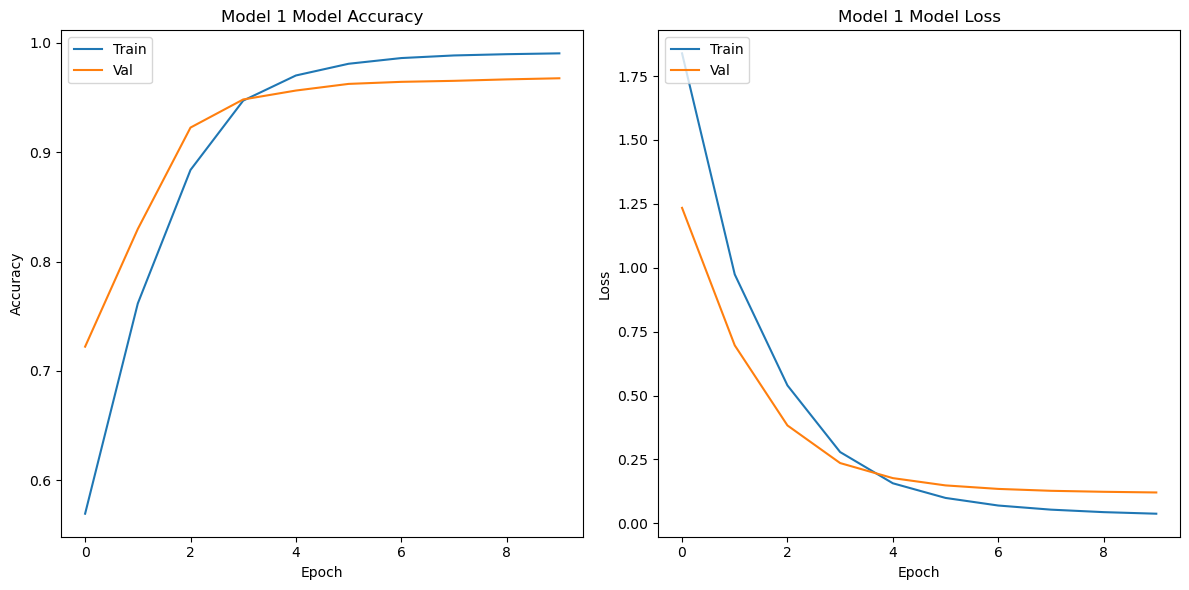

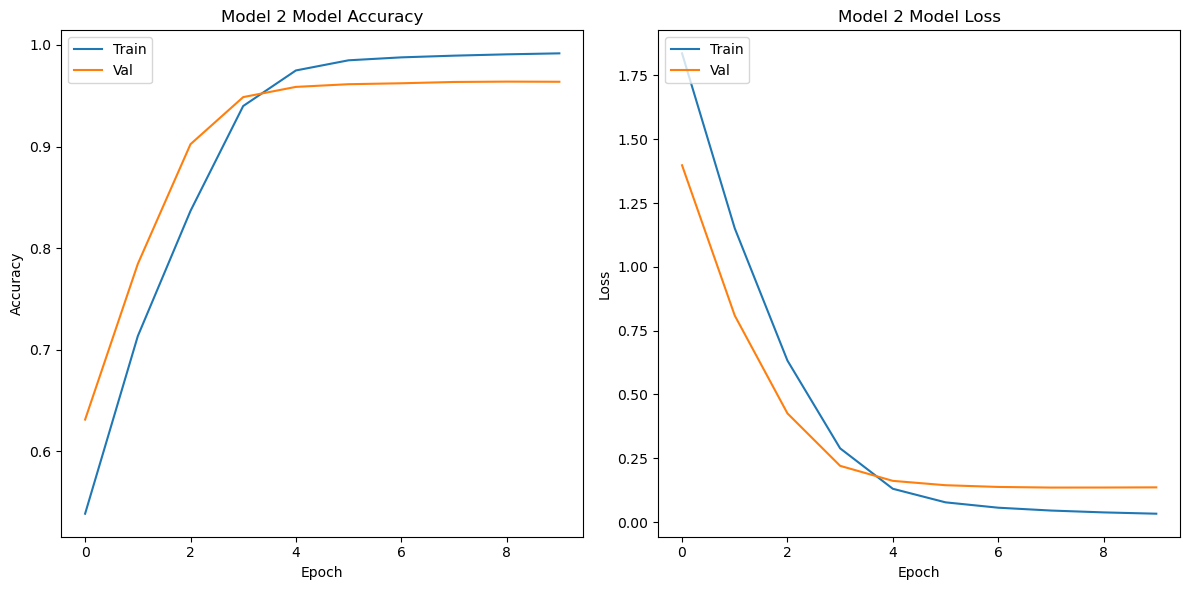

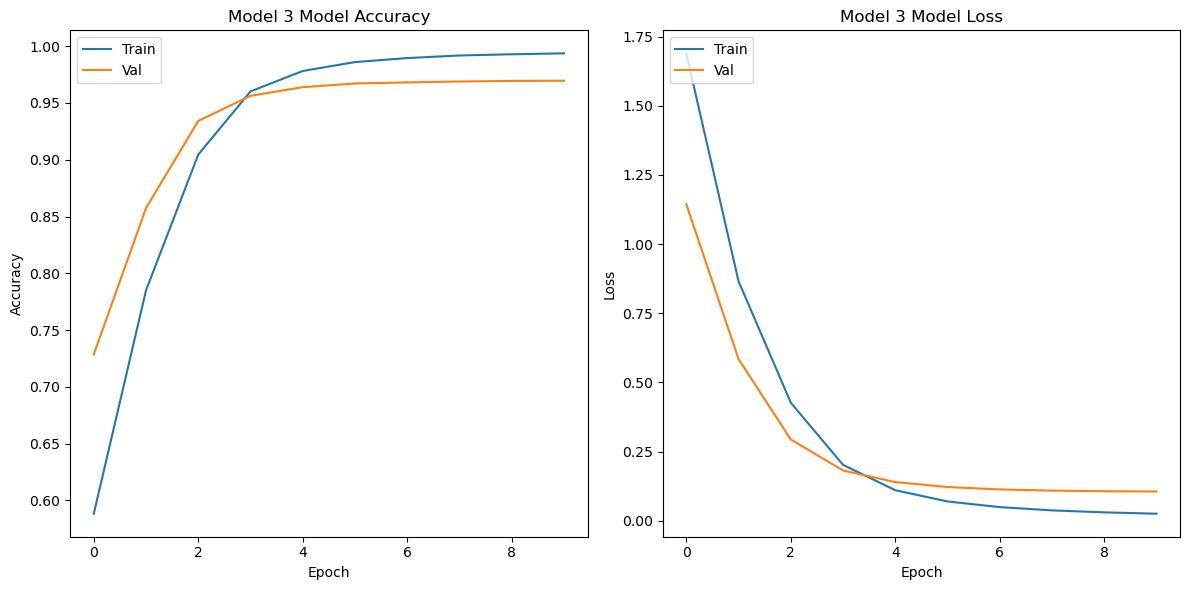

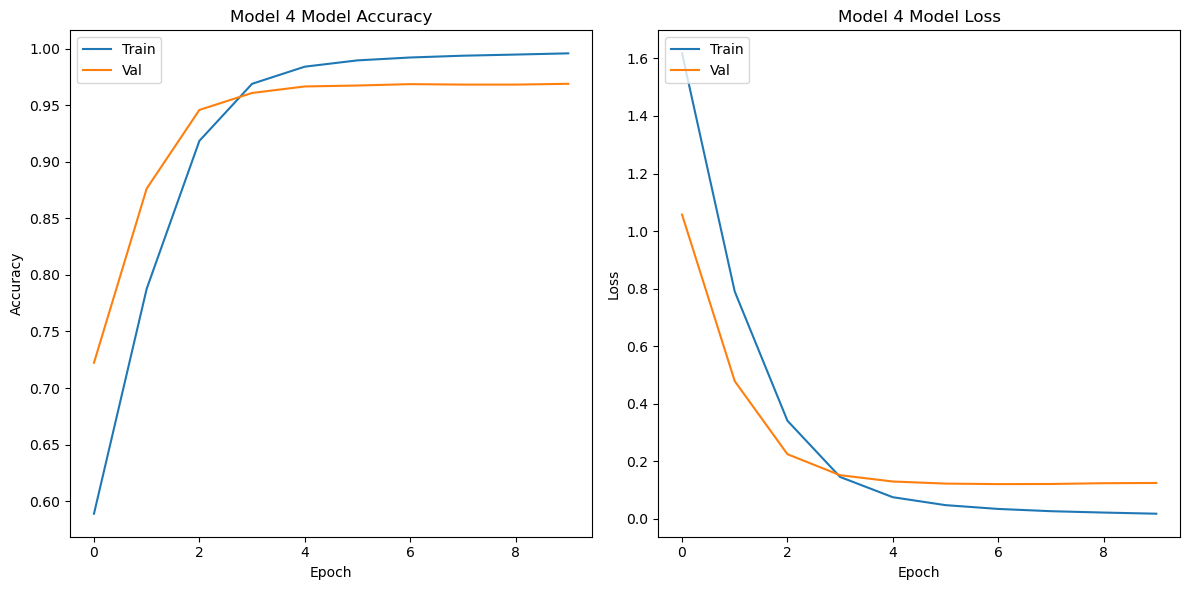

Mean Validation Accuracy - Model 1: 0.9205662906169891
Mean Validation Accuracy - Model 2: 0.9040153086185455
Mean Validation Accuracy - Model 3: 0.928352028131485
Mean Validation Accuracy - Model 4: 0.9313673853874207


In [19]:
# Import necessary libraries from TensorFlow, Keras, and other utilities.
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, TimeDistributed, Bidirectional
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import treebank

# Download the treebank dataset from NLTK
nltk.download('treebank')

def load_data():
    # Load the tagged sentences from the treebank dataset
    sentences = treebank.tagged_sents()
    return sentences

def preprocess_data(sentences):
    # Create sets to store unique words and tags
    words = set()
    tags = set()

    # Iterate through each sentence and each word in the sentence
    for sentence in sentences:
        for word, tag in sentence:
            words.add(word)
            tags.add(tag)
    
    # Create word-to-index and tag-to-index dictionaries
    word_to_index = {w: i + 2 for i, w in enumerate(words)}
    word_to_index["PAD"] = 0  # Padding token
    word_to_index["UNK"] = 1  # Unknown token
    
    tag_to_index = {t: i + 1 for i, t in enumerate(tags)}
    tag_to_index["PAD"] = 0  # Padding token
    
    # Create index-to-word and index-to-tag dictionaries
    index_to_word = {i: w for w, i in word_to_index.items()}
    index_to_tag = {i: t for t, i in tag_to_index.items()}
    
    return word_to_index, tag_to_index, index_to_word, index_to_tag

# Load and preprocess the data
sentences = load_data()
word_to_index, tag_to_index, index_to_word, index_to_tag = preprocess_data(sentences)

def convert_sentences_to_sequences(sentences, word_to_index, tag_to_index):
    # Convert sentences and tags to sequences of indices
    X = [[word_to_index.get(word, word_to_index["UNK"]) for word, _ in sentence] for sentence in sentences]
    y = [[tag_to_index[tag] for _, tag in sentence] for sentence in sentences]
    return X, y

# Convert sentences and tags to sequences
X, y = convert_sentences_to_sequences(sentences, word_to_index, tag_to_index)

# Define the maximum length of sequences
max_len = 50

# Pad the sequences to the maximum length
X = pad_sequences(X, maxlen=max_len, padding="post")
y = pad_sequences(y, maxlen=max_len, padding="post")

# One-hot encode the tag sequences
y = [to_categorical(i, num_classes=len(tag_to_index)) for i in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


# Model 1: Simple RNN with Single Layer (64 units)
model_1 = Sequential()
model_1.add(Embedding(input_dim=len(word_to_index), output_dim=64, input_length=max_len))
model_1.add(SimpleRNN(units=64, return_sequences=True, recurrent_dropout=0.1))
model_1.add(TimeDistributed(Dense(len(tag_to_index), activation="softmax")))
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history_1 = model_1.fit(X_train, np.array(y_train), batch_size=32, epochs=10, validation_data=(X_test, np.array(y_test)), verbose=1)

# Model 2: Stacked RNN with 2 Layers (64 units each)
model_2 = Sequential()
model_2.add(Embedding(input_dim=len(word_to_index), output_dim=64, input_length=max_len))
model_2.add(SimpleRNN(units=64, return_sequences=True, recurrent_dropout=0.1))
model_2.add(SimpleRNN(units=64, return_sequences=True, recurrent_dropout=0.1))
model_2.add(TimeDistributed(Dense(len(tag_to_index), activation="softmax")))
model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history_2 = model_2.fit(X_train, np.array(y_train), batch_size=32, epochs=10, validation_data=(X_test, np.array(y_test)), verbose=1)

# Model 3: Bidirectional RNN with Single Layer (64 units)
model_3 = Sequential()
model_3.add(Embedding(input_dim=len(word_to_index), output_dim=64, input_length=max_len))
model_3.add(Bidirectional(SimpleRNN(units=64, return_sequences=True, recurrent_dropout=0.1)))
model_3.add(TimeDistributed(Dense(len(tag_to_index), activation="softmax")))
model_3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history_3 = model_3.fit(X_train, np.array(y_train), batch_size=32, epochs=10, validation_data=(X_test, np.array(y_test)), verbose=1)

# Model 4: Stacked Bidirectional RNN with 2 Layers (64 units each)
model_4 = Sequential()
model_4.add(Embedding(input_dim=len(word_to_index), output_dim=64, input_length=max_len))
model_4.add(Bidirectional(SimpleRNN(units=64, return_sequences=True, recurrent_dropout=0.1)))
model_4.add(Bidirectional(SimpleRNN(units=64, return_sequences=True, recurrent_dropout=0.1)))
model_4.add(TimeDistributed(Dense(len(tag_to_index), activation="softmax")))
model_4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history_4 = model_4.fit(X_train, np.array(y_train), batch_size=32, epochs=10, validation_data=(X_test, np.array(y_test)), verbose=1)

# Function to plot accuracy and loss curves
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plotting accuracy and loss curves for each model
plot_history(history_1, "Model 1")
plot_history(history_2, "Model 2")
plot_history(history_3, "Model 3")
plot_history(history_4, "Model 4")

# Function to calculate mean validation accuracy
def mean_validation_accuracy(history):
    val_acc = history.history['val_accuracy']
    mean_acc = np.mean(val_acc)
    return mean_acc

# Calculate and print mean validation accuracy for each model
mean_acc_1 = mean_validation_accuracy(history_1)
mean_acc_2 = mean_validation_accuracy(history_2)
mean_acc_3 = mean_validation_accuracy(history_3)
mean_acc_4 = mean_validation_accuracy(history_4)

print(f"Mean Validation Accuracy - Model 1: {mean_acc_1}")
print(f"Mean Validation Accuracy - Model 2: {mean_acc_2}")
print(f"Mean Validation Accuracy - Model 3: {mean_acc_3}")
print(f"Mean Validation Accuracy - Model 4: {mean_acc_4}")

In [20]:
print(f"Mean Validation Accuracy - Model 1: {mean_acc_1:.4f}")
print(f"Mean Validation Accuracy - Model 2: {mean_acc_2:.4f}")
print(f"Mean Validation Accuracy - Model 3: {mean_acc_3:.4f}")
print(f"Mean Validation Accuracy - Model 4: {mean_acc_4:.4f}")

Mean Validation Accuracy - Model 1: 0.9206
Mean Validation Accuracy - Model 2: 0.9040
Mean Validation Accuracy - Model 3: 0.9284
Mean Validation Accuracy - Model 4: 0.9314
